<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/ai9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1
  Data 1: Error = -1, Update W = [ 1.5   2.05 -1.7 ]
  Data 2: No Error, W = [ 1.5   2.05 -1.7 ]
  Data 3: No Error, W = [ 1.5   2.05 -1.7 ]
  Data 4: Error = -1, Update W = [ 1.   1.4 -2.2]
Epoch 2
  Data 1: Error = -1, Update W = [ 0.5   1.05 -2.4 ]
  Data 2: Error = 1, Update W = [ 1.   1.5 -1.8]
  Data 3: Error = 1, Update W = [ 1.5   1.95 -1.1 ]
  Data 4: Error = -1, Update W = [ 1.   1.3 -1.6]

Final weights: [ 1.   1.3 -1.6]

Prediksi data baru [0.8, 1.2] = -0.88 => Bangkrut


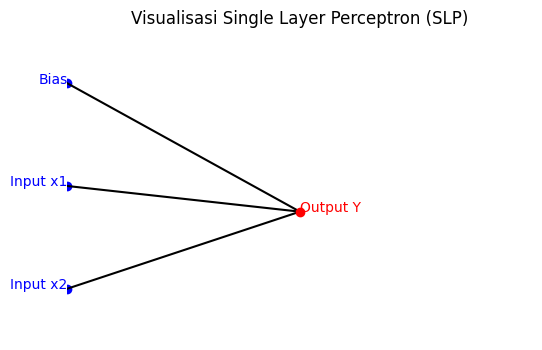

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data training: [bias, x1, x2]
X = np.array([
    [1, 0.7, 0.4],
    [1, 0.9, 1.2],
    [1, 0.9, 1.4],
    [1, 1.3, 1.0]
])
Y = np.array([0, 1, 1, 0])  # 0 = bangkrut, 1 = tidak bangkrut

# Bobot awal [bias_weight, w1, w2]
W = np.array([2.0, 2.4, -1.5])

# Parameter
learning_rate = 0.5
threshold = 0

# Fungsi aktivasi (step function)
def activation(v):
    return 1 if v >= threshold else 0

# Training (2 iterasi sesuai Excel)
for epoch in range(2):
    print(f"Epoch {epoch+1}")
    for i in range(len(X)):
        x_i = X[i]
        y_true = Y[i]

        v = np.dot(W, x_i)
        y_pred = activation(v)
        error = y_true - y_pred

        if error != 0:
            delta_w = learning_rate * error * x_i
            W += delta_w
            print(f"  Data {i+1}: Error = {error}, Update W = {W}")
        else:
            print(f"  Data {i+1}: No Error, W = {W}")

print("\nFinal weights:", W)

# Prediksi data baru
x_new = np.array([0, 0.8, 1.2])
v_new = np.dot(W, x_new)
y_new = activation(v_new)

# Interpretasi hasil prediksi
status = "Tidak Bangkrut" if y_new == 1 else "Bangkrut"
print(f"\nPrediksi data baru [0.8, 1.2] = {v_new:.2f} => {status}")

# --- Visualisasi Single Layer Perceptron (SLP) ---
def visualize_slp():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_title("Visualisasi Single Layer Perceptron (SLP)")
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1.2)

    input_neurons = ["Bias", "Input x1", "Input x2"]
    for i, label in enumerate(input_neurons):
        ax.text(0, 1 - i*0.4, label, fontsize=10, color="blue", ha='right')
        ax.plot(0, 1 - i*0.4, 'bo')

        # Garis ke output
        ax.plot([0, 1], [1 - i*0.4, 0.5], 'k-')

    ax.text(1, 0.5, "Output Y", fontsize=10, color="red", ha='left')
    ax.plot(1, 0.5, 'ro')

    ax.set_xlabel("Layer")
    ax.set_ylabel("Neuron")
    ax.axis("off")
    plt.show()

# Tampilkan diagram
visualize_slp()
